In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

warnings.filterwarnings("ignore")

from src.vertical_logs_analyzer import VerticalLogsAnalyzer
from src.relation_matrix import AllenRelationsFinderNaiveMethod
from src.data_preparation import prepare_logs
import time

In [2]:
from generator.logs_generator import generate_logs
generated_logs = generate_logs('overlaps')

Generate relation 'A' overlaps 'B' 
99.9%

In [3]:
df_times = pd.DataFrame(columns=['number_of_traces'])
max_number_of_task = 1000
list_of_fraction = [x for x in np.logspace(-2, 0, 100) if x > 0.05]
df_times['number_of_traces'] = [int(max_number_of_task * _) for _ in list_of_fraction]

In [4]:
max_iter = 25
for iteration in range(0, max_iter, 1):
    list_of_times_trapezoid_method = []
    list_of_times_polynomial_method = []
    list_of_times_relation_matrix_method = []

    for frac in list_of_fraction:
        sampled_logs = generated_logs[generated_logs['case_id'].isin(pd.Series(generated_logs['case_id'].unique()).sample(frac=frac, random_state=0))]

        V = VerticalLogsAnalyzer(logs=sampled_logs)

        # Trapezoid method:
        start_time_t = time.time()
        V.core_trapezoid_method('A', 'B')
        list_of_times_trapezoid_method.append(time.time() - start_time_t)

        # Polynomail method:
        start_time_p = time.time()
        V.core_polynomial_method('A', 'B')
        list_of_times_polynomial_method.append(time.time() - start_time_p)

        # Relation matrix method
        rm = AllenRelationsFinderNaiveMethod(logs=sampled_logs)

        start_time_rm = time.time()
        relation_matrix = rm.create_relation_matrix(number_of_following_tasks_considered=1)
        founded_relations = rm.find_relations(relation_threshold=0.7)
        list_of_times_relation_matrix_method.append(time.time() - start_time_rm)
    print("\r{}%".format(round(100*((iteration+1)/max_iter)),2), end='')
    df_times['Trapezoid {}'.format(iteration)] = list_of_times_trapezoid_method
    df_times['Polynomial {}'.format(iteration)] = list_of_times_polynomial_method
    df_times['Relation {}'.format(iteration)] = list_of_times_relation_matrix_method
    
    df_times.to_csv('time_dataframe.csv', index=False)

df_times.head(10)

100%

In [5]:
df = pd.read_csv('time_dataframe.csv')

,number_of_traces,Trapezoid 0,Polynomial 0,Relation 0,Trapezoid 1,Polynomial 1,Relation 1,Trapezoid 2,Polynomial 2,Relation 2,...,Relation 21,Trapezoid 22,Polynomial 22,Relation 22,Trapezoid 23,Polynomial 23,Relation 23,Trapezoid 24,Polynomial 24,Relation 24
0,50,0.019966,0.086002,0.085032,0.017004,0.048211,0.068220,0.017961,0.047240,0.071416,...,0.094357,0.031161,0.089163,0.126375,0.025992,0.088424,0.144288,0.021003,0.064321,0.083106
1,53,0.021002,0.518064,1.191018,0.016000,0.046994,0.079960,0.018047,0.047228,0.074475,...,0.092403,0.030002,0.076364,0.108356,0.035001,0.087215,0.131355,0.019211,0.056136,0.096298
2,55,0.129162,0.479219,0.325970,0.017037,0.053962,0.081002,0.017002,0.047193,0.074562,...,0.126574,0.027008,0.083381,0.123469,0.034000,0.087995,0.106997,0.018996,0.052125,0.092003
3,58,0.051998,0.180528,0.287400,0.018037,0.049004,0.079574,0.020033,0.050134,0.080446,...,0.113462,0.026001,0.071163,0.135310,0.019971,0.058990,0.095577,0.019159,0.056216,0.091209
4,61,0.071002,0.224551,0.186732,0.016999,0.051037,0.085001,0.019004,0.059203,0.100494,...,0.166534,0.028124,0.097279,0.159194,0.021228,0.054008,0.094993,0.018998,0.055007,0.094153
5,64,0.022998,0.065050,0.112532,0.018003,0.051250,0.088122,0.016192,0.055230,0.089366,...,0.133311,0.029198,0.093142,0.140367,0.019002,0.054001,0.115996,0.024001,0.051997,0.101002
6,67,0.018002,0.054997,0.103738,0.016265,0.053002,0.147961,0.018998,0.051998,0.092282,...,0.158493,0.028145,0.080255,0.142340,0.025002,0.053004,0.098161,0.022000,0.065274,0.132959
7,70,0.016996,0.049000,0.099965,0.020998,0.051041,0.102285,0.016006,0.046161,0.098216,...,0.163421,0.027001,0.064249,0.145125,0.021000,0.072399,0.137413,0.029161,0.083003,0.141617
8,73,0.018000,0.053999,0.099036,0.018002,0.051002,0.102256,0.015244,0.053960,0.100004,...,0.168008,0.023999,0.068311,0.160152,0.020179,0.073036,0.148354,0.023194,0.070143,0.137294
9,77,0.016000,0.048958,0.111001,0.017001,0.052267,0.106341,0.016998,0.050219,0.103566,...,0.171649,0.029004,0.078204,0.146346,0.025996,0.071997,0.160541,0.017965,0.066005,0.133397


In [6]:
df_time_stats = pd.DataFrame()
df_time_stats['number_of_traces'] = df['number_of_traces']

for method_name in ['Trapezoid', 'Polynomial', 'Relation']:
    cols = [_ for _ in df.columns if _.startswith(method_name)]
    df_time_stats['mean_{}'.format(method_name)] = df[cols].mean(axis=1)
    df_time_stats['std_{}'.format(method_name)] = df[cols].std(axis=1)

In [7]:
df_time_stats.head()

,number_of_traces,mean_Trapezoid,std_Trapezoid,mean_Polynomial,std_Polynomial,mean_Relation,std_Relation
0,50,0.022197,0.005929,0.065695,0.021433,0.089679,0.024681
1,53,0.021730,0.005849,0.077581,0.093124,0.134819,0.220819
2,55,0.025014,0.022367,0.080897,0.084788,0.103989,0.051906
3,58,0.022900,0.008412,0.064157,0.026805,0.104279,0.043206
4,61,0.022164,0.010954,0.067811,0.035541,0.109325,0.030754


# Time comparison

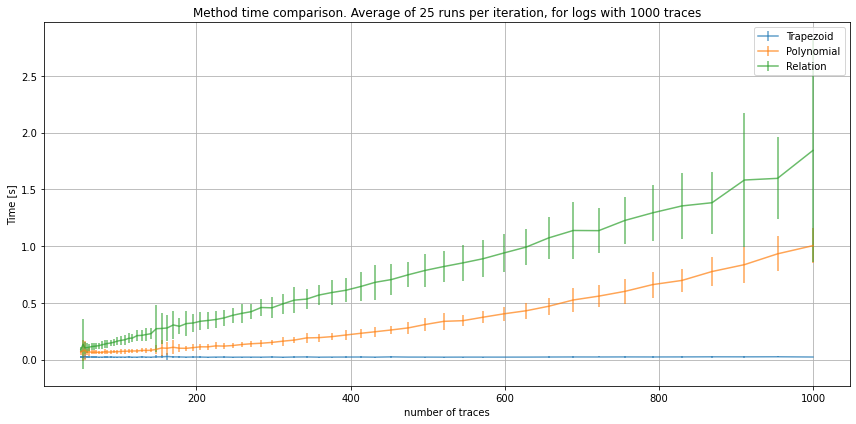

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,6])
for method_name in ['Trapezoid', 'Polynomial', 'Relation']:
    ax.errorbar(x=df_time_stats['number_of_traces'], 
                y=df_time_stats['mean_{}'.format(method_name)], 
                yerr=df_time_stats['std_{}'.format(method_name)], 
                alpha=0.7, label=method_name)
ax.set(xlabel='number of traces', ylabel='Time [s]')
ax.grid()
plt.legend()
plt.title('Method time comparison. Average of {0} runs per iteration, for logs with {1} traces'.format(max_iter, max_number_of_task))
plt.tight_layout()
plt.show()


# Logarithmic Time Comparison

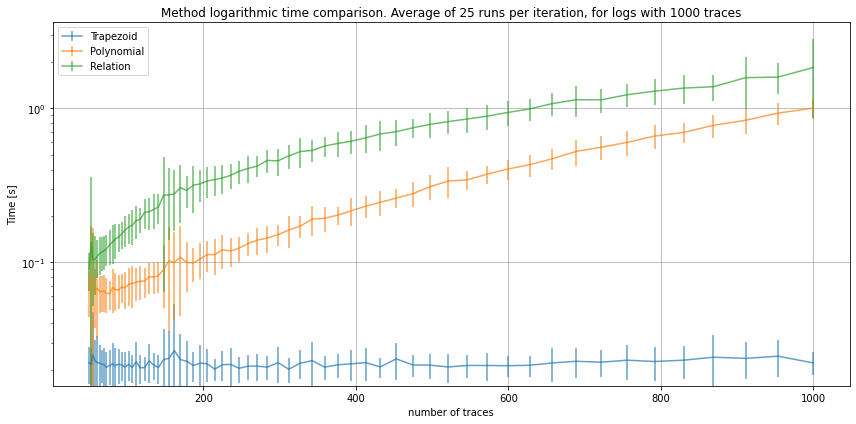

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,6])
for method_name in ['Trapezoid', 'Polynomial', 'Relation']:
    ax.errorbar(x=df_time_stats['number_of_traces'], 
                y=df_time_stats['mean_{}'.format(method_name)], 
                yerr=df_time_stats['std_{}'.format(method_name)], 
                alpha=0.7, label=method_name)
ax.set(xlabel='number of traces', ylabel='Time [s]')
ax.grid()
plt.yscale('log')
plt.legend()
plt.title('Method logarithmic time comparison. Average of {0} runs per iteration, for logs with {1} traces'.format(max_iter, max_number_of_task))
plt.tight_layout()
plt.show()